# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Prediction with Multiple Logistic Regression

In this section we use the feature matrices and response vectors with features selected in chapter 2.  

#### We use two different versions (created in chapter 1, features-selected in chapter 2):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  

In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use("seaborn-whitegrid")
%matplotlib inline

## 3.0. Choose which Feature Matrix (Version 1 or 2) you want to load in by choosing the Case
### Available are: Case 1 and Case 2

In [2]:
# If case = 1, Feature Matrix Version 1 is used (see description above below title)
# If case = 2, feature matrix Version 2 is used (see description above below title)

_CASE_ = 1

## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [3]:
# import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if _CASE_ == 1:
    X_train_s = pd.read_csv('Data/generated_splits/X1_train_s.csv', sep=',', header=0)
    X_test_s = pd.read_csv('Data/generated_splits/X1_test_s.csv', sep=',', header=0)
    y_train_s = pd.read_csv('Data/generated_splits/y1_train_s.csv', sep=',', header=0)
    y_test_s = pd.read_csv('Data/generated_splits/y1_test_s.csv', sep=',', header=0)
elif _CASE_ == 2:
    X_train_s = pd.read_csv('Data/generated_splits/X2_train_s.csv', sep=',', header=0)
    X_test_s = pd.read_csv('Data/generated_splits/X2_test_s.csv', sep=',', header=0)
    y_train_s = pd.read_csv('Data/generated_splits/y2_train_s.csv', sep=',', header=0)
    y_test_s = pd.read_csv('Data/generated_splits/y2_test_s.csv', sep=',', header=0)
else: raise ValueError('_CASE_ value must be either 1 or 2')


### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector

### Train Set

In [4]:
print("")
print('Shape (rows, columns) of Feature Matrix X (Train), Case ' + str(_CASE_), ' = ' + str(X_train_s.shape))
print("")
print("")
print('Feature Matrix X (Train) with selected Features, Case ' + str(_CASE_))
display(X_train_s.head(3))
print("")
print('Response Vector y (Train) after Feature Selection, Case ' + str(_CASE_))
display(y_train_s.head(3))
print("")


Shape (rows, columns) of Feature Matrix X (Train), Case 1  = (2836, 15)


Feature Matrix X (Train) with selected Features, Case 1


,CAPEI,pcf,divyield,pe_inc,evm,bm,pe_op_dil,PEG_ltgforward,pe_op_basic,ptb,aftret_equity,accrual,pe_exi,PEG_1yrforward,fcf_ocf
0,20.773,9.957,0.0354,18.484,10.644,0.547,15.633,5.963,15.468,1.811,0.134,0.048,18.484,13.678,0.932
1,25.089,8.509,0.0398,39.232,9.246,0.461,17.296,5.702,17.203,2.189,0.058,0.047,39.232,1.521,0.441
2,12.337,1.993,0.0268,13.062,12.474,0.911,9.209,2.248,9.135,1.076,0.086,0.038,13.062,0.380,1.000



Response Vector y (Train) after Feature Selection, Case 1


,0
0,1
1,0
2,1


### Test Set

In [5]:
print("")
print('Shape (rows, columns) of Feature Matrix X (Test), Case ' + str(_CASE_), ' = ' + str(X_test_s.shape))
print("")
print('Feature Matrix X (Test) with selected Features, Case ' + str(_CASE_))
display(X_test_s.head(3))
print("")
print('Response Vector y (Test) after Feature Selection, Case ' + str(_CASE_))
display(y_test_s.head(3))


Shape (rows, columns) of Feature Matrix X (Test), Case 1  = (710, 15)

Feature Matrix X (Test) with selected Features, Case 1


,CAPEI,pcf,divyield,pe_inc,evm,bm,pe_op_dil,PEG_ltgforward,pe_op_basic,ptb,aftret_equity,accrual,pe_exi,PEG_1yrforward,fcf_ocf
0,20.983,10.484,0.0187,16.224,8.585,0.254,16.224,1.330,16.127,4.189,0.310,0.084,16.224,1.414,0.863
1,21.663,7.709,0.0122,18.555,13.619,0.235,16.489,1.572,16.311,4.281,0.238,0.039,18.555,1.737,0.902
2,16.327,8.490,0.0343,15.550,6.716,0.513,9.520,6.149,9.520,2.198,0.130,0.077,15.681,-0.973,0.934



Response Vector y (Test) after Feature Selection, Case 1


,0
0,0
1,1
2,1


## 3.2. Simple Logistic Regression (statsmodels) (SLM)

### 3.2.1. Preparation and fitting (on Training Set) (SLM)

In [54]:
## Logistic Regression (with the most important feature from feature selection)
# Assign "best_feature" to matrix X and response to y
if _CASE_ == 1:
    best_feature = 'CAPEI'
elif _CASE_ == 2:
    best_feature = 'RET'
else: raise ValueError('_CASE_ value must be either 1 or 2')

logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[[best_feature]])).fit()

Optimization terminated successfully.
         Current function value: 0.685746
         Iterations 5


In [7]:
# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### 3.2.2. Summary (SLM)

In [8]:
# LogReg with only one feature as exogen variable
print(logReg.summary())
print("")
print('logReg pvalues: ')
print("")
print(logReg.pvalues)

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2834
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:               0.0005333
Time:                        16:26:53   Log-Likelihood:                -1944.8
converged:                       True   LL-Null:                       -1945.8
                                        LLR p-value:                    0.1497
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1839      0.055      3.349      0.001       0.076       0.291
CAPEI          0.0027      0.002      1.363      0.173      -0.001       0.007

logReg pvalues: 

const    0.000812
CAPEI    0.1728

### 3.2.3. Assessing Output (SLM)

### Hypothesis testing / Confidence Interval

In [55]:
significance_level = 0.01

print("")
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' + str(int(significance_level*100)) + '%)')
logReg.conf_int(alpha=significance_level)


99% Confidence Interval (Significance Level 1%)


,0,1
const,0.042441,0.325312
CAPEI,-0.002391,0.007766


### Confusion Matrix

In [10]:
logReg.pred_table(threshold=0.5)

array([[   0., 1250.],
       [   2., 1584.]])

### 3.2.2. Prediction (SML)

### A: In-sample Prediction of probability for returns going UP in the next period (predict y_train)


#### For whole Training Set

In [21]:
if _CASE_ == 1:
    print('Active: Case ' + str(_CASE_))
elif _CASE_ == 2:
    print('Active: Case ' + str(_CASE_))
else: raise ValueError('_CASE_ value must be either 1 or 2')

# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for the whole test set
print("")
print('Predicted probability of price going UP for whole Feature Train Set is: ')
pred_train_all = logReg.predict(sm.add_constant(X_train_s[[best_feature]]))
display(pred_train_all.head(3))
display(y_train_s.head(3))

Active: Case 1

Predicted probability of price going UP for whole Feature Train Set is: 


0    0.559639
1    0.562496
2    0.554045
dtype: float64

,0
0,1
1,0
2,1


### B: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For chosen value of predictive variable


In [22]:
if _CASE_ == 1:
    print('Active: Case ' + str(_CASE_))
    print('Chosen best feature = ' + str(best_feature))
    best_feature_value = 15
    print('Chosen value of best feature = ' + str(best_feature_value))
elif _CASE_ == 2:
    print('Active: Case ' + str(_CASE_))
    print('Chosen best feature = ' + str(best_feature))
    best_feature_value = 0.02
    print('Chosen value of best feature = ' + str(best_feature_value))
else: raise ValueError('_CASE_ value must be either 1 or 2')

# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for a best_feature_value of USD 15
pred_test_one = logReg.predict([1, best_feature_value])
ratio_response_train = y_train_s.sum() / y_train_s.size

print("")
print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: ' 
      + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')

Active: Case 1
Chosen best feature = CAPEI
Chosen value of best feature = 15

Predicted probability of price going UP with chosen CAPEI value is: 55.5813%
Ratio of "UP" (Train)  =  55.9238%


#### For whole Test Set

In [23]:
if _CASE_ == 1:
    print('Active: Case ' + str(_CASE_))
elif _CASE_ == 2:
    print('Active: Case ' + str(_CASE_))
else: raise ValueError('_CASE_ value must be either 1 or 2')

# we wish to get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg.predict(sm.add_constant(X_test_s[[best_feature]]))

print("")
print('Predicted probability of price going UP for whole Feature Test Set is: ')
display(pred_test_all.head(3))
display(y_test_s.head(3))

Active: Case 1

Predicted probability of price going UP for whole Feature Test Set is: 


0    0.559778
1    0.560229
2    0.556693
dtype: float64

,0
0,0
1,1
2,1


### 3.2.3. Plot Results (SLM)

Chosen best feature for CASE 1 is: CAPEI



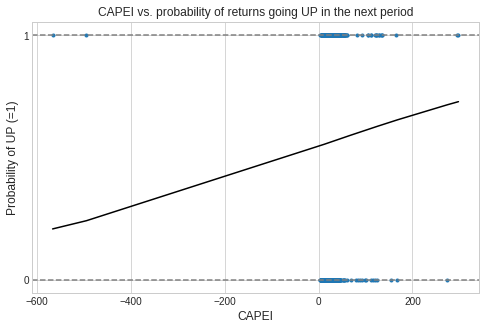

In [24]:
print('Chosen best feature for CASE ' + str(_CASE_) + ' is: ' + str(best_feature))
print("")
  
# Transfer best_feature column an prediction for response vector in a newly made dataframe "res"
res = pd.DataFrame()
res['best_feature'] = X_train_s[best_feature]
res['pred'] = logReg.predict()

# Sort results by values of the best_feature column
res = res.sort_values('best_feature')

# Plot scatter and log.Reg
plt.figure(figsize =(8,5))
plt.scatter(X_train_s[best_feature], y_train_s, marker ='.')
plt.plot(res.best_feature, res.pred, c = 'k')
plt.axhline(y=0, color = "gray", linestyle = "dashed")
plt.axhline(y=1, color = "gray", linestyle = "dashed")
plt.ylabel("Probability of UP (=1)", fontsize =12)
plt.xlabel(str(best_feature), fontsize =12)
plt.title(str(best_feature) + ' vs. probability of returns going UP in the next period');

## 3.3. Multiple Logistic Regression with n pre-selected features (MLR1)

### 3.3.1. Preparation and fitting (on Training Set) (MLR1)

In [25]:
## Multiple Log. Regression (with all n best features chosen in Chapter 2 in the feature selection process)
logReg_m = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s)).fit()

Optimization terminated successfully.
         Current function value: 0.669582
         Iterations 6


### 3.3.2. Summary (MLR1)

In [26]:
print("")
print("Multiple Logistic Regression with all selected features")
print(78*"_")  ##### <<== WAS?
print("")

# Run Multiple Logistic Regression
print(logReg_m.summary().tables[0])
print(logReg_m.summary().tables[1])


Multiple Logistic Regression with all selected features
______________________________________________________________________________

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2820
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:                 0.02409
Time:                        16:31:44   Log-Likelihood:                -1898.9
converged:                       True   LL-Null:                       -1945.8
                                        LLR p-value:                 1.962e-13
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0675      0.262     -0.258      0.797      -

### 3.3.3. Assessing Output (MLR1)

### Hypothesis testing / Confidence Interval

In [56]:
significance_level = 0.01

print("")
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' + str(int(significance_level*100)) + '%)')
display(logReg_m.conf_int(alpha=significance_level))


99% Confidence Interval (Significance Level 1%)


,0,1
const,-0.742602,0.607602
CAPEI,-0.003235,0.006580
pcf,-0.002001,0.020226
divyield,-28.731549,-9.966473
pe_inc,-0.012895,0.004930
evm,-0.060085,-0.013209
bm,0.497128,1.711656
pe_op_dil,-0.082555,-0.003318
PEG_ltgforward,-0.024198,0.042092
pe_op_basic,0.011700,0.117929


### Confusion Matrix

In [28]:
logReg_m.pred_table(threshold=0.5)

array([[ 349.,  901.],
       [ 227., 1359.]])

### 3.3.4. Prediction (MLR1)
Multiple Logistic Regression 1 (pre-selected features with RandomForest in Chapter 2) 

### A: In-sample Prediction of probability for returns going UP in the next period (predict y_train)

#### For whole Training Set


In [29]:
if _CASE_ == 1:
    print('Active: Case ' + str(_CASE_))
elif _CASE_ == 2:
    print('Active: Case ' + str(_CASE_))
else: raise ValueError('_CASE_ value must be either 1 or 2')

# we wish to get the probability of 'UP' (=1) for the whole training set
pred_train_all = logReg_m.predict(sm.add_constant(X_train_s))

print("")
print('Predicted probability of price going UP for whole Feature Train Set is: ')
display(pred_train_all.head(10))
display(y_train_s.head(10))

Active: Case 1

Predicted probability of price going UP for whole Feature Train Set is: 


0    0.567440
1    0.528367
2    0.581356
3    0.631523
4    0.600770
5    0.491411
6    0.561593
7    0.653504
8    0.243099
9    0.530230
dtype: float64

,0
0,1
1,0
2,1
3,1
4,1
5,0
6,0
7,1
8,0
9,0


### B: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For whole Test Set


In [32]:
if _CASE_ == 1:
    print('Active: Case ' + str(_CASE_))
elif _CASE_ == 2:
    print('Active: Case ' + str(_CASE_))
else: raise ValueError('_CASE_ value must be either 1 or 2')

# we wish to get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg_m.predict(sm.add_constant(X_test_s))

print("")
print('Predicted probability of price going UP for whole Feature Test Set is: ')
display(pred_test_all.head(3))
display(y_test_s.head(3))

Active: Case 1

Predicted probability of price going UP for whole Feature Test Set is: 


0    0.602718
1    0.579294
2    0.547866
dtype: float64

,0
0,0
1,1
2,1


In [33]:
# compare LogReg with only one feature as exogen variable & LogReg 1 
# (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

In [34]:
# Check for non significant values (p-value > 0.05) and the Log-Likelihood value

## 3.4. Multiple Logistic Regression with only significant features (MLR2)

Apply an other multiple logistic regression on a transformed dataset with only all significant values from LogReg_m (above)

### 3.4.1. Extract significant features (MLR2)

In [45]:
# extracting significant features with an alpha-boundery of 0.05
sign_features = (X_train_s.columns.values[np.where(logReg_m.pvalues < 0.05)])

print("")
print('Features that were significant in the previous MLR in chapter 3.3.:')
print("")
print(list(sign_features))


Features that were significant in the previous MLR in chapter 3.3.:

['divyield', 'pe_inc', 'bm', 'pe_op_dil', 'PEG_ltgforward', 'ptb', 'aftret_equity', 'accrual']


### 3.4.2. Preparation and fitting (on Training Set) (MLR2)

In [57]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y
logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()


Optimization terminated successfully.
         Current function value: 0.675177
         Iterations 6


### 3.4.3. Summary (MLR2)

In [60]:
print("")
print("Multiple Logistic Regression with selected significant features")
print("")
print(logReg_mm.summary().tables[0])
print(logReg_mm.summary().tables[1])


Multiple Logistic Regression with selected significant features

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2827
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:                 0.01594
Time:                        16:58:47   Log-Likelihood:                -1914.8
converged:                       True   LL-Null:                       -1945.8
                                        LLR p-value:                 1.865e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0934      0.194     -0.481      0.631      -0.474       0.287
divyield         -17.5726      3.449     -5.095      

In [ ]:
# compare LogReg 1 & 2 (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

In [ ]:
# Does the logistic regression support our choice in feature selection (with random forest)?

# CODE DIRECTLY COPIED FROM STEFANIE FILE

### 2.2.2 Multiple Logistic Regression with all selected features (for dataset number 2, because error message)

In [ ]:
## Multiple Log. Regression (tried with all 15 features from feature selection, but it gives an error because it seems that
# there are dependent columns)
# Assign features to X and response vector y
#X = sm.add_constant(X2_train_s)
#y = y2_train

# check for all independent columns
import sympy 
reduced_form, inds = sympy.Matrix(X2_train_s.values).rref()
reduced_form

# independent columns
inds

# Assign features to X and response vector y-> because of inds only until column 14
X = sm.add_constant(X2_train_s.iloc[:, 0:14])
y = y2_train

In [ ]:
# LogReg A
print("Multiple Logistic Regression with all selected features")
print(78*"_")
print("")
# Run Log.Reg
logRegA = sm.Logit(endog = y, exog= X).fit()
print(logRegA.summary().tables[0])
print(logRegA.summary().tables[1])

In [ ]:
# compare LogReg with only one feature as exogen variable & LogReg A 
# (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

# Check for non significant values (p-value > 0.05) and the Log-Likelihood value

### 2.2.3 Multiple Logistic Regression with only significant features (for dataset number 2, because error message)

In [ ]:
# extracting significant features with an alpha-boundery of 0.05
sign_features = (colNms_X2_train[np.where(logReg.pvalues < 0.05)])
print(sign_features)

### 2.2.3. Summary

In [ ]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y
X = sm.add_constant(X2_train_s[sign_features])
y = y2_train
logReg = sm.Logit(endog = y, exog=X).fit()

# LogReg B
print("Multiple Logistic Regression with selected significant features")
print(78*"_")
print("")
print(logReg.summary().tables[0])
print(logReg.summary().tables[1])

In [ ]:
# compare LogReg A & B (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))
# Does the logistic regression support our choice in feature selection (with random forest)?

## 3. Prediction

### 3.1 Version 1 with best LogReg Model

In [ ]:
modelA = LogisticRegression()
modelA.fit(X1_train_s, y1_train)

expected = y1_test
predicted = modelA.predict(X1_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)

### 3.2 Version 2 with best LogReg Model

In [ ]:
modelB = LogisticRegression()
modelB.fit(X2_train_s, y2_train)

expected = y2_test
predicted = modelB.predict(X2_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)